<a href="https://colab.research.google.com/github/seohyeon1578/TensorFlow/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# 회귀

## 선형 회귀(Linear Regression)


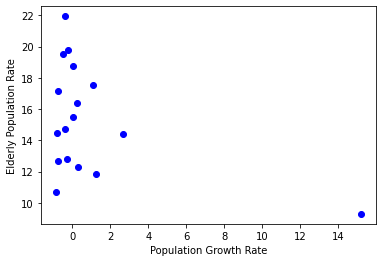

In [108]:
#지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

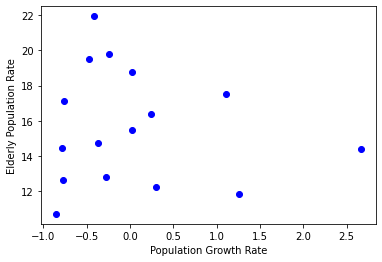

In [109]:
#극단치(outlier) 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


<function matplotlib.pyplot.show>

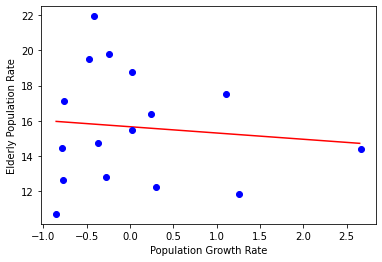

In [110]:
#최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#x, y의 평균 구하기
x_bar = sum(X) / len(Y)
y_bar = sum(Y) / len(X)

#최소제곱법
a = sum([(y - y_bar) * (x - x_bar) for y,x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

#그래프를 그리기 위한 회귀선의 x, y 데이터 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 0.13366045 b: 6.4452586 loss: 94.6667
199 a: -0.10690604 b: 10.983691 loss: 31.68497
299 a: -0.24966346 b: 13.670763 loss: 13.765759
399 a: -0.31834126 b: 14.963541 loss: 10.277769
499 a: -0.34492669 b: 15.463992 loss: 9.822865
599 a: -0.3532298 b: 15.6203 loss: 9.783202
699 a: -0.35532716 b: 15.659782 loss: 9.780894
799 a: -0.3557542 b: 15.667824 loss: 9.780807
899 a: -0.3558244 b: 15.66913 loss: 9.780803
999 a: -0.35583317 b: 15.669302 loss: 9.780804


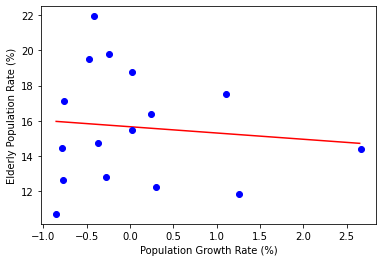

In [111]:
# 텐서플로를 이용한 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a,b 랜덤 값 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
  
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 다항 회귀(Polynomial Regression)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 3.881025 b: -5.5586996 c: 6.4262133 loss: 69.09729
199 a: 2.8709188 b: -4.6610427 c: 10.203123 loss: 32.27711
299 a: 1.3644913 b: -2.4179711 c: 12.814369 loss: 16.558271
399 a: 0.3856147 b: -0.9489723 c: 14.478846 loss: 11.183087
499 a: -0.15049106 b: -0.1448376 c: 15.392583 loss: 9.784296
599 a: -0.40517646 b: 0.23714228 c: 15.826875 loss: 9.504767
699 a: -0.5105065 b: 0.39511445 c: 16.006498 loss: 9.461718
799 a: -0.5484909 b: 0.45208302 c: 16.071276 loss: 9.456609
899 a: -0.5604252 b: 0.46998212 c: 16.091629 loss: 9.456144
999 a: -0.5636794 b: 0.47486275 c: 16.097178 loss: 9.456112


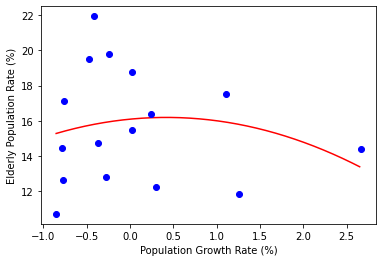

In [112]:
# 텐서플로우를 이용해 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c 랜덤 값 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def compute_loss():
  y_pred = a * X * X + b * X + c                         #ax**2+bx+c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: -1.0000303 b: 5.417454 c: -3.7609723 d: 6.1754737 loss: 66.71013
199 a: -1.8455098 b: 6.6087174 c: -2.5863845 d: 9.795365 loss: 31.550196
299 a: -1.683722 b: 5.2346735 c: -1.0797652 d: 11.973764 loss: 20.577456
399 a: -1.0437117 b: 3.1181464 c: -0.57238144 d: 13.4664345 loss: 14.783464
499 a: -0.36329684 b: 1.1099132 c: -0.44847542 d: 14.581964 loss: 11.3738575
599 a: 0.19915871 b: -0.511298 c: -0.41247785 d: 15.427206 loss: 9.529604
699 a: 0.61831576 b: -1.7138633 c: -0.39510638 d: 16.045593 loss: 8.63202
799 a: 0.9105936 b: -2.551685 c: -0.38418463 d: 16.475185 loss: 8.238587
899 a: 1.1029537 b: -3.1029859 c: -0.37716287 d: 16.757666 loss: 8.083181
999 a: 1.2226624 b: -3.4460487 c: -0.37282243 d: 16.933405 loss: 8.027896


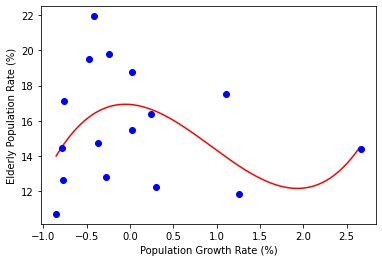

In [113]:
# 3차함수
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c 랜덤 값 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

def compute_loss():
  y_pred = a * X * X * X + b * X * X + c * X + d                        #ax**3+bx**2+cx+d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 딥러닝 네트워크를 이용한 회귀

In [114]:
# 딥러닝 네크워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),     #활성화함수 tanh를 사용, tanh: 하이퍼볼릭 탄젠트 함수로 삼각함수 중 탄젠트 함수와 연관 입력을 받아 -1과 1 사이의 출력을 반환
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 6)                 12        
                                                                 
 dense_59 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [115]:
# 딥러닝 네트워크 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 312ms/step - loss: 254.9744
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 103.5412
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 10.5368
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 9.6131
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 9.4850
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 9.4357
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 9.3948
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 9.3522
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 9.3054
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 9.2533


In [116]:
# Y값 예측
model.predict(X)

array([[16.05029 ],
       [15.447154],
       [15.240758],
       [16.07182 ],
       [15.422412],
       [16.06406 ],
       [15.985471],
       [15.819894],
       [15.462062],
       [15.902825],
       [15.337164],
       [15.871724],
       [15.968855],
       [16.070587],
       [15.476771],
       [13.74922 ]], dtype=float32)

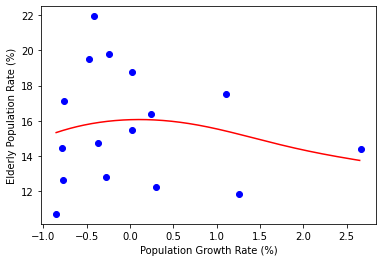

In [117]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

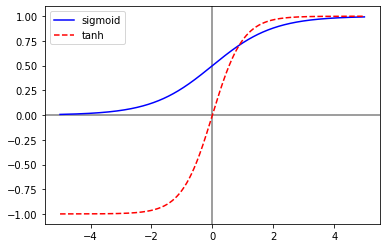

In [118]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

## 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [119]:
# 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [120]:
# 데이터 정규화(전처리)
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean 
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [121]:
import tensorflow as tf
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),     #활성화 함수 relu : y=x 함수의 음수 부분을 정류해서 0으로 만든 것, 여러개의 레이어를 겹쳐 사용할때 시그모이드나 tanh보다 좋은 결과를 얻을 수 있음
  tf.keras.layers.Dense(units=39, activation='relu'),
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 52)                728       
                                                                 
 dense_61 (Dense)            (None, 39)                2067      
                                                                 
 dense_62 (Dense)            (None, 26)                1040      
                                                                 
 dense_63 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


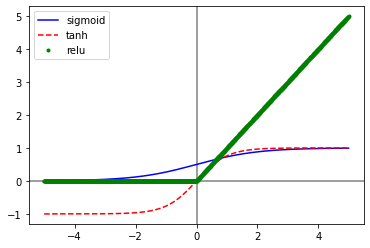

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [123]:
#회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 21ms/step - loss: 1.6899 - val_loss: 1.2579
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.8977 - val_loss: 1.1304
Epoch 3/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7435 - val_loss: 1.1160
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6590 - val_loss: 1.1746
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6490 - val_loss: 1.0704
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6632 - val_loss: 1.1144
Epoch 7/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6370 - val_loss: 1.0472
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6120 - val_loss: 1.0801
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.5864 - val_loss: 1.0142
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6200 - val_loss: 0.9522
Epoch 11/25
10/10 

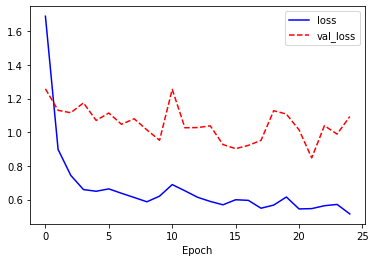

In [124]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [125]:
# 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 5ms/step - loss: 0.7523


0.7522958517074585

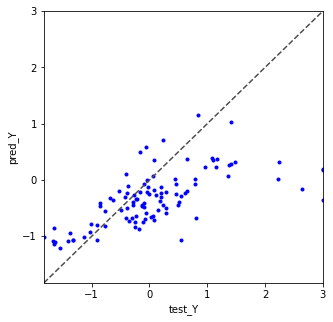

In [126]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y),max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

In [139]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]) #학습을 일찍 멈추는 기능 3회의 에포크 수행 val_loss를 지켜봄 

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 19ms/step - loss: 3.4890 - val_loss: 1.3221
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.9120 - val_loss: 1.1234
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8306 - val_loss: 1.2010
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.8574 - val_loss: 1.2933
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7276 - val_loss: 1.1095
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7085 - val_loss: 1.2460
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7101 - val_loss: 1.1831
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6770 - val_loss: 1.1084
Epoch 9/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6430 - val_loss: 1.1643
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6615 - val_loss: 1.2130
Epoch 11/25
10/10 [==========

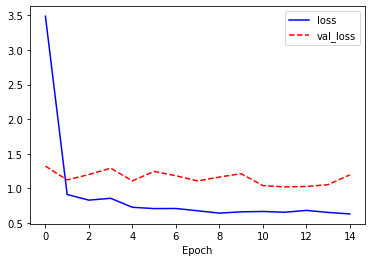

In [140]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [141]:
# 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.7317


0.731731116771698

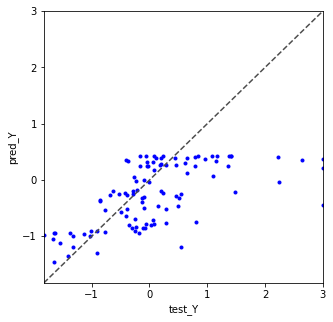

In [142]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()